In [50]:
with open("input.txt") as file:
    cpu_instructions = file.read().split('\n')

In [36]:
cpu_instructions="""addx 15
addx -11
addx 6
addx -3
addx 5
addx -1
addx -8
addx 13
addx 4
noop
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx -35
addx 1
addx 24
addx -19
addx 1
addx 16
addx -11
noop
noop
addx 21
addx -15
noop
noop
addx -3
addx 9
addx 1
addx -3
addx 8
addx 1
addx 5
noop
noop
noop
noop
noop
addx -36
noop
addx 1
addx 7
noop
noop
noop
addx 2
addx 6
noop
noop
noop
noop
noop
addx 1
noop
noop
addx 7
addx 1
noop
addx -13
addx 13
addx 7
noop
addx 1
addx -33
noop
noop
noop
addx 2
noop
noop
noop
addx 8
noop
addx -1
addx 2
addx 1
noop
addx 17
addx -9
addx 1
addx 1
addx -3
addx 11
noop
noop
addx 1
noop
addx 1
noop
noop
addx -13
addx -19
addx 1
addx 3
addx 26
addx -30
addx 12
addx -1
addx 3
addx 1
noop
noop
noop
addx -9
addx 18
addx 1
addx 2
noop
noop
addx 9
noop
noop
noop
addx -1
addx 2
addx -37
addx 1
addx 3
noop
addx 15
addx -21
addx 22
addx -6
addx 1
noop
addx 2
addx 1
noop
addx -10
noop
noop
addx 20
addx 1
addx 2
addx 2
addx -6
addx -11
noop
noop
noop""".split("\n")

In [51]:
x=1
cycles = 1
instruction_index = 0
cycle_values= list(range(20,260,40))
x_values = {}

for instruction in cpu_instructions:
    cpu_instruction = instruction.split(" ")
    if len(cpu_instruction) == 1:
        if cycles in cycle_values:
            x_values[cycles] = x
        cycles += 1
        if cycles in cycle_values:
            x_values[cycles] = x
    else:
        if cycles in cycle_values:
            x_values[cycles] = x
        cycles += 1
        if cycles in cycle_values:
            x_values[cycles] = x
        value = int(cpu_instruction[1])
        cycles += 1
        if cycles in cycle_values:
            x_values[cycles] = x
        x += value

In [52]:
sum([cycle*x_values[cycle] for cycle in x_values])

12520

In [53]:
x_values

{20: 17, 60: 17, 100: 7, 140: 21, 180: 21, 220: 17}

In [54]:
import numpy as np
screen = np.zeros((6,40))

In [55]:
def update_screen(cycle, position):
    vertical_index = (cycle-1)//40
    horizontal_index = (cycle-1)%40
    if (position-horizontal_index) in [-1,0,1]:
        screen[vertical_index][horizontal_index] = 255

In [56]:
x=1
cycles = 1
instruction_index = 0
cycle_values= list(range(20,260,40))
x_values = {}

for instruction in cpu_instructions:
    cpu_instruction = instruction.split(" ")
    if len(cpu_instruction) == 1:
        if cycles in cycle_values:
            x_values[cycles] = x
        update_screen(cycles, x)
        cycles += 1
        if cycles in cycle_values:
            x_values[cycles] = x
        update_screen(cycles, x)
    else:
        if cycles in cycle_values:
            x_values[cycles] = x
        update_screen(cycles, x)
        cycles += 1
        update_screen(cycles, x)
        if cycles in cycle_values:
            x_values[cycles] = x
        value = int(cpu_instruction[1])
        update_screen(cycles, x)
        cycles += 1
        if cycles in cycle_values:
            x_values[cycles] = x
        x += value

In [57]:
import matplotlib.pyplot as plt

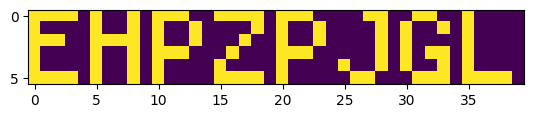

In [58]:
plt.imshow(screen)